In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [72]:
for i in df.columns:
    print(i, len(df[i].unique()))

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [62]:
df2 = pd.concat([df["Segment"],df["Sales"],df["Category"]], axis=1)
df2

,Segment,Sales,Category
0,Consumer,261.9600,Furniture
1,Consumer,731.9400,Furniture
2,Corporate,14.6200,Office Supplies
3,Consumer,957.5775,Furniture
4,Consumer,22.3680,Office Supplies
...,...,...,...
9989,Consumer,25.2480,Furniture
9990,Consumer,91.9600,Furniture
9991,Consumer,258.5760,Technology
9992,Consumer,29.6000,Office Supplies


<AxesSubplot:xlabel='Segment', ylabel='Sales'>

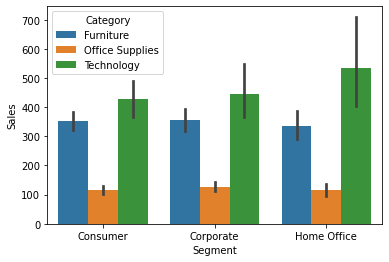

In [63]:
sns.barplot(x=df2['Segment'], y=df2['Sales'], hue=df2['Category'])

In [64]:
df2['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [65]:
df2[(df2['Category'] == 'Furniture')&(df2['Segment']=='Consumer')]

,Segment,Sales,Category
0,Consumer,261.9600,Furniture
1,Consumer,731.9400,Furniture
3,Consumer,957.5775,Furniture
5,Consumer,48.8600,Furniture
10,Consumer,1706.1840,Furniture
...,...,...,...
9928,Consumer,24.2700,Furniture
9931,Consumer,683.3320,Furniture
9980,Consumer,85.9800,Furniture
9989,Consumer,25.2480,Furniture


In [54]:
df2[(df2['Category'] == 'Furniture')&(df2['Segment']=='Consumer')].sum()

Segment     ConsumerConsumerConsumerConsumerConsumerConsum...
Sales                                              391049.312
Category    FurnitureFurnitureFurnitureFurnitureFurnitureF...
Quantity                                                 4166
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
df.corrwith(df["Sales"]).sort_values()

Discount      -0.028190
Postal Code   -0.023854
Row ID        -0.001359
Quantity       0.200795
Profit         0.479064
Sales          1.000000
dtype: float64

In [68]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [71]:
X = pd.DataFrame(df["Sales"], columns=["Sales"])
y = pd.DataFrame(df["Quantity"], columns=["Quantity"])
X

,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680
...,...
9989,25.2480
9990,91.9600
9991,258.5760
9992,29.6000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)